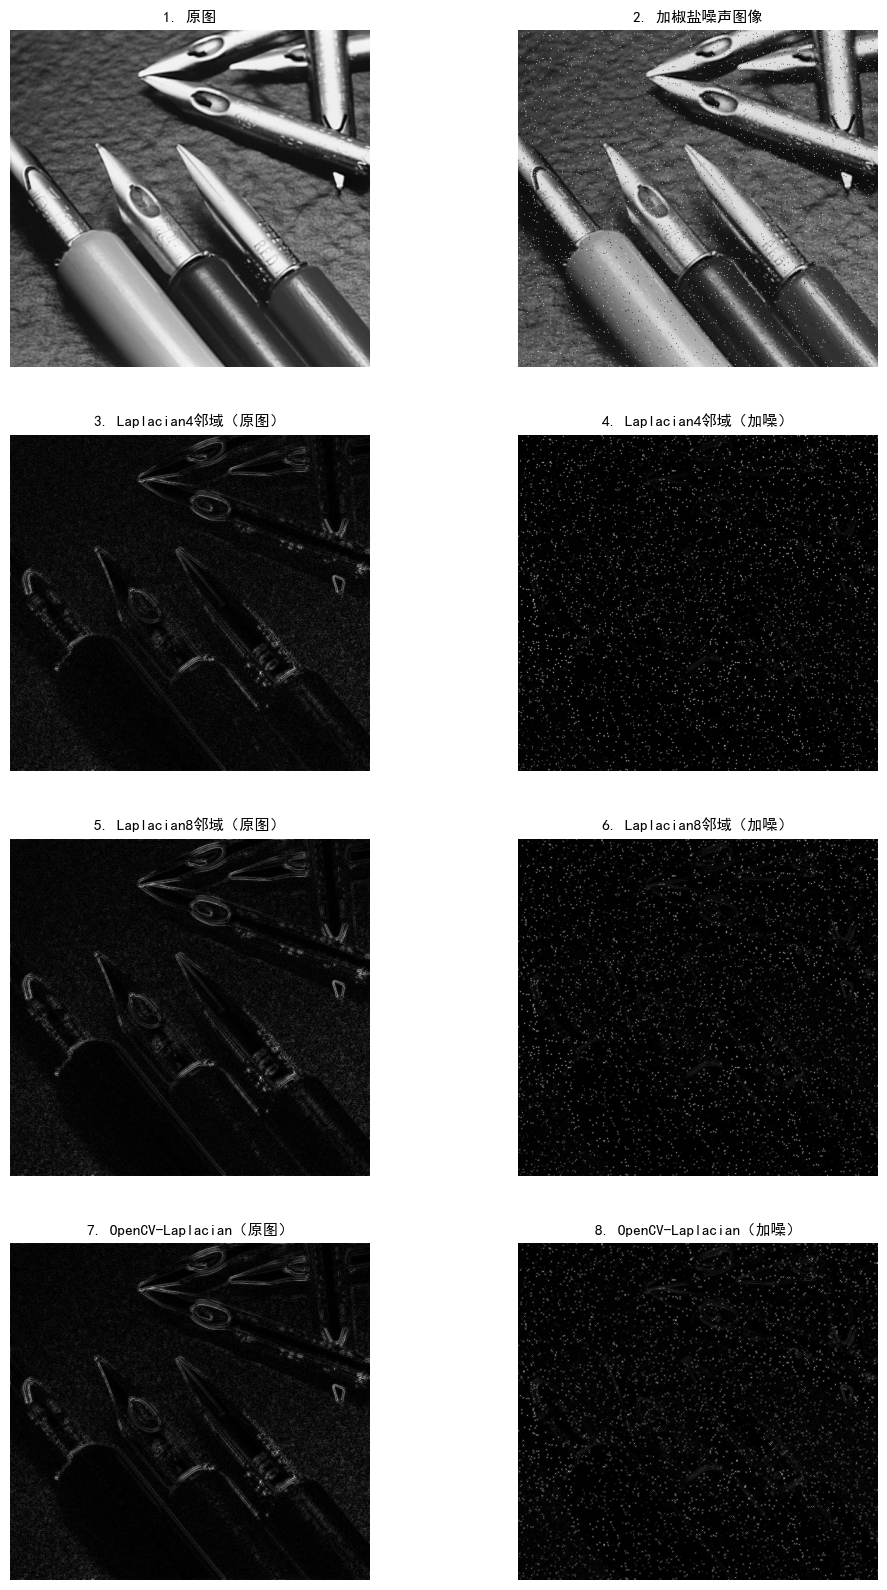

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# ---------------------- 1. 工具函数（仅必要的噪声生成） ----------------------
def add_salt_pepper_noise(img, noise_ratio=0.02):
    noisy_img = img.copy()
    noise_num = int(noise_ratio * img.size)
    for _ in range(noise_num//2):
        x = np.random.randint(0, img.shape[0])
        y = np.random.randint(0, img.shape[1])
        noisy_img[x, y] = 255
    for _ in range(noise_num//2):
        x = np.random.randint(0, img.shape[0])
        y = np.random.randint(0, img.shape[1])
        noisy_img[x, y] = 0
    return noisy_img

# ---------------------- 2. 图像加载与预处理 ----------------------
# 读取灰度图像（替换为你的图像路径）
img = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)
# 若读取失败，生成500×500的矩形测试图（比随机图更易观察边缘）
if img is None:
    img = np.zeros((500, 500), dtype=np.uint8)
    cv2.rectangle(img, (100, 100), (400, 400), 200, -1)
    cv2.circle(img, (250, 250), 100, 150, -1)

# 生成加噪图像（椒盐噪声比例0.02）
img_noisy = add_salt_pepper_noise(img, noise_ratio=0.02)

# ---------------------- 3. Laplacian算子边缘检测（核心逻辑） ----------------------
# 定义4邻域Laplacian卷积核（二阶微分离散化）
laplacian_kernel = np.array([[0, 1, 0],
                             [1, -4, 1],
                             [0, 1, 0]], dtype=np.float32)

# 原图Laplacian检测
img_float = img.astype(np.float64)
laplacian_origin = cv2.filter2D(img_float, cv2.CV_64F, laplacian_kernel)
laplacian_origin = np.abs(laplacian_origin)
laplacian_origin = cv2.normalize(laplacian_origin, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# 加噪图Laplacian检测
img_noisy_float = img_noisy.astype(np.float64)
laplacian_noisy = cv2.filter2D(img_noisy_float, cv2.CV_64F, laplacian_kernel)
laplacian_noisy = np.abs(laplacian_noisy)
laplacian_noisy = cv2.normalize(laplacian_noisy, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# 扩展：8邻域Laplacian检测（可选对比）
laplacian_kernel_8 = np.array([[1, 1, 1],
                               [1, -8, 1],
                               [1, 1, 1]], dtype=np.float32)
laplacian_8_origin = cv2.filter2D(img_float, cv2.CV_64F, laplacian_kernel_8)
laplacian_8_origin = np.abs(laplacian_8_origin)
laplacian_8_origin = cv2.normalize(laplacian_8_origin, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

laplacian_8_noisy = cv2.filter2D(img_noisy_float, cv2.CV_64F, laplacian_kernel_8)
laplacian_8_noisy = np.abs(laplacian_8_noisy)
laplacian_8_noisy = cv2.normalize(laplacian_8_noisy, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# ---------------------- 4. 可视化对比（4×2竖版布局，和你原代码一致） ----------------------
plt.figure(figsize=(10, 16))

plt.subplot(4, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('1. 原图', fontsize=11)
plt.axis('off')

plt.subplot(4, 2, 2)
plt.imshow(img_noisy, cmap='gray')
plt.title('2. 加椒盐噪声图像', fontsize=11)
plt.axis('off')

plt.subplot(4, 2, 3)
plt.imshow(laplacian_origin, cmap='gray')
plt.title('3. Laplacian4邻域（原图）', fontsize=11)
plt.axis('off')

plt.subplot(4, 2, 4)
plt.imshow(laplacian_noisy, cmap='gray')
plt.title('4. Laplacian4邻域（加噪）', fontsize=11)
plt.axis('off')

plt.subplot(4, 2, 5)
plt.imshow(laplacian_8_origin, cmap='gray')
plt.title('5. Laplacian8邻域（原图）', fontsize=11)
plt.axis('off')

plt.subplot(4, 2, 6)
plt.imshow(laplacian_8_noisy, cmap='gray')
plt.title('6. Laplacian8邻域（加噪）', fontsize=11)
plt.axis('off')

# 补充：OpenCV内置Laplacian对比（可选）
laplacian_cv = cv2.Laplacian(img, cv2.CV_64F, ksize=3)
laplacian_cv = np.abs(laplacian_cv)
laplacian_cv = cv2.normalize(laplacian_cv, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

laplacian_cv_noisy = cv2.Laplacian(img_noisy, cv2.CV_64F, ksize=3)
laplacian_cv_noisy = np.abs(laplacian_cv_noisy)
laplacian_cv_noisy = cv2.normalize(laplacian_cv_noisy, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

plt.subplot(4, 2, 7)
plt.imshow(laplacian_cv, cmap='gray')
plt.title('7. OpenCV-Laplacian（原图）', fontsize=11)
plt.axis('off')

plt.subplot(4, 2, 8)
plt.imshow(laplacian_cv_noisy, cmap='gray')
plt.title('8. OpenCV-Laplacian（加噪）', fontsize=11)
plt.axis('off')

plt.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0.2)
plt.show()

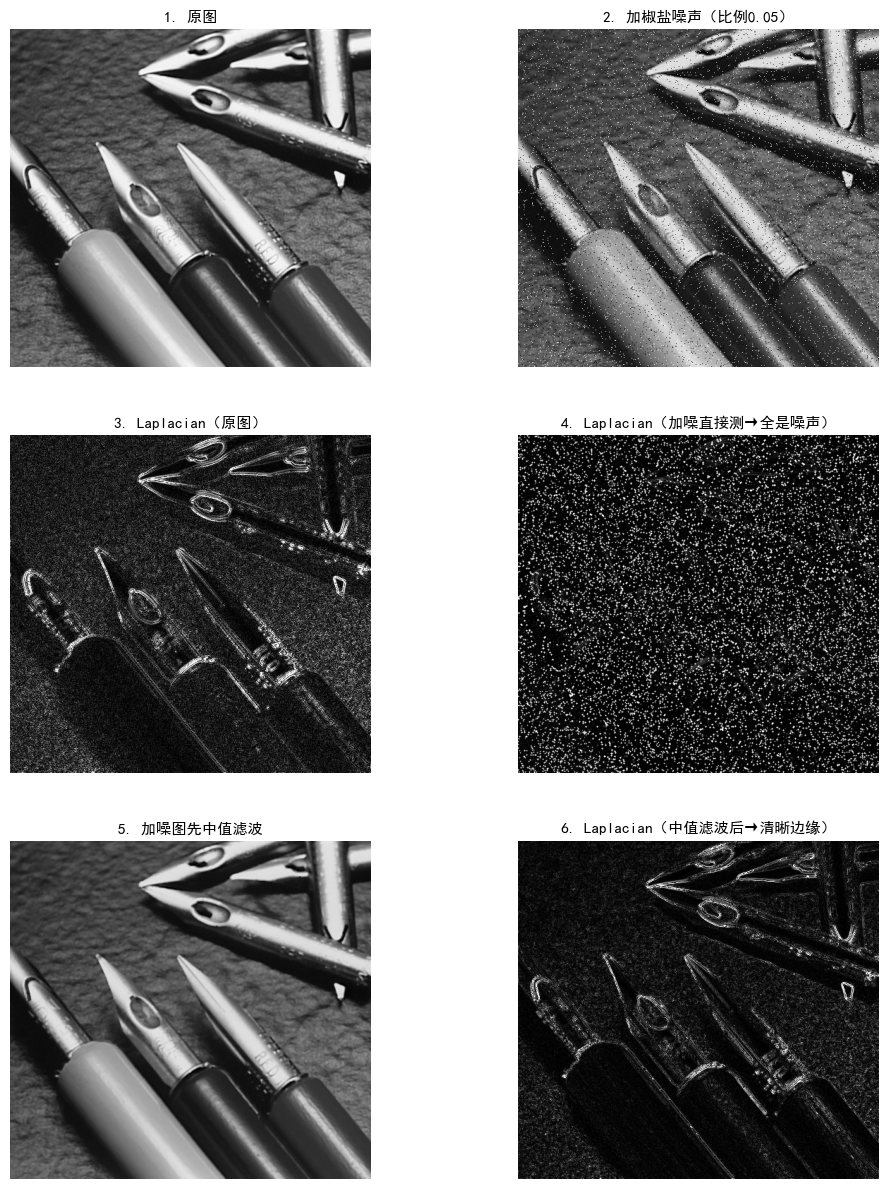

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# ---------------------- 1. 工具函数 ----------------------
def add_salt_pepper_noise(img, noise_ratio=0.02):
    noisy_img = img.copy()
    noise_num = int(noise_ratio * img.size)
    for _ in range(noise_num//2):
        x = np.random.randint(0, img.shape[0])
        y = np.random.randint(0, img.shape[1])
        noisy_img[x, y] = 255
    for _ in range(noise_num//2):
        x = np.random.randint(0, img.shape[0])
        y = np.random.randint(0, img.shape[1])
        noisy_img[x, y] = 0
    return noisy_img

# ---------------------- 2. 图像加载与预处理 ----------------------
img = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)
if img is None:
    img = np.zeros((500, 500), dtype=np.uint8)
    cv2.rectangle(img, (100, 100), (400, 400), 200, -1)
    cv2.circle(img, (250, 250), 100, 150, -1)

# 生成椒盐噪声（比例调高到0.05，更明显）
img_noisy = add_salt_pepper_noise(img, noise_ratio=0.05)

# 关键：椒盐噪声用中值滤波去噪（核大小3×3，必须是奇数）
img_noisy_smooth = cv2.medianBlur(img_noisy, 3)  # 替换高斯滤波为中值滤波

# ---------------------- 3. Laplacian 检测 ----------------------
laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]], dtype=np.float32)

# 原图 Laplacian
img_float = img.astype(np.float64)
laplacian_origin = cv2.filter2D(img_float, cv2.CV_64F, laplacian_kernel)
laplacian_origin = np.abs(laplacian_origin)
laplacian_origin = cv2.normalize(laplacian_origin, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# 加噪图直接 Laplacian（傻掉版）
img_noisy_float = img_noisy.astype(np.float64)
laplacian_noisy = cv2.filter2D(img_noisy_float, cv2.CV_64F, laplacian_kernel)
laplacian_noisy = np.abs(laplacian_noisy)
laplacian_noisy = cv2.normalize(laplacian_noisy, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# 加噪图先中值滤波再 Laplacian（椒盐噪声专属救回版）
img_noisy_smooth_float = img_noisy_smooth.astype(np.float64)
laplacian_noisy_smooth = cv2.filter2D(img_noisy_smooth_float, cv2.CV_64F, laplacian_kernel)
laplacian_noisy_smooth = np.abs(laplacian_noisy_smooth)
laplacian_noisy_smooth = cv2.normalize(laplacian_noisy_smooth, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# 增强对比度（让边缘更明显）
laplacian_origin = cv2.convertScaleAbs(laplacian_origin, alpha=3)
laplacian_noisy = cv2.convertScaleAbs(laplacian_noisy, alpha=3)
laplacian_noisy_smooth = cv2.convertScaleAbs(laplacian_noisy_smooth, alpha=3)

# ---------------------- 4. 可视化对比 ----------------------
plt.figure(figsize=(10, 12))

plt.subplot(3, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('1. 原图', fontsize=11)
plt.axis('off')

plt.subplot(3, 2, 2)
plt.imshow(img_noisy, cmap='gray')
plt.title('2. 加椒盐噪声（比例0.05）', fontsize=11)
plt.axis('off')

plt.subplot(3, 2, 3)
plt.imshow(laplacian_origin, cmap='gray')
plt.title('3. Laplacian（原图）', fontsize=11)
plt.axis('off')

plt.subplot(3, 2, 4)
plt.imshow(laplacian_noisy, cmap='gray')
plt.title('4. Laplacian（加噪直接测→全是噪声）', fontsize=11)
plt.axis('off')

plt.subplot(3, 2, 5)
plt.imshow(img_noisy_smooth, cmap='gray')
plt.title('5. 加噪图先中值滤波', fontsize=11)
plt.axis('off')

plt.subplot(3, 2, 6)
plt.imshow(laplacian_noisy_smooth, cmap='gray')
plt.title('6. Laplacian（中值滤波后→清晰边缘）', fontsize=11)
plt.axis('off')

plt.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0.2)
plt.show()